# Confidence intervals for observables

In [35]:
import SMEFT19
import matplotlib.pyplot as plt
import numpy as np
import yaml

In [8]:
scs = [SMEFT19.scenarios.scIV, SMEFT19.scenarios.scVII, SMEFT19.scenarios.scIX, SMEFT19.scenarios.scX, SMEFT19.scenarios.scXI]
dictsc = [SMEFT19.ellipse.load(f'../data/ellipses/{s.__name__}.yaml') for s in scs]

In [71]:
def recursiveDict(d):
    for k, v in d.items():
        if isinstance(v, dict):
            d[k] = recursiveDict(v)
    return dict(d)

## 1D fits

In [33]:
supIX = []
infIX = []
for o in SMEFT19.obsuncert.obslist:
    infIX.append(SMEFT19.SMEFTglob.prediction(dictsc[2]['bf'] - (1/dictsc[2]['d'])**0.5, o, scs[2]))
    supIX.append(SMEFT19.SMEFTglob.prediction(dictsc[2]['bf'] + (1/dictsc[2]['d'])**0.5, o, scs[2]))

In [74]:
with open('../data/observables/obsIX.yaml', 'rt') as f:
    yamlIX = yaml.safe_load(f)

In [79]:
for i, o in enumerate(SMEFT19.obsuncert.obslist):
    uStat = abs(supIX[i]-infIX[i])
    yamlIX[str(o)]['NP']['uncert'] = float((yamlIX[str(o)]['NP']['uncert']**2-yamlIX[str(o)]['NP']['uStat']**2+uStat**2)**0.5)
    yamlIX[str(o)]['NP']['uStat'] = float(uStat)

In [80]:
with open('../data/observables/obsIX.yaml', 'wt') as f:
    yaml.dump(recursiveDict(yamlIX), f)

In [34]:
supX = []
infX = []
for o in SMEFT19.obsuncert.obslist:
    infX.append(SMEFT19.SMEFTglob.prediction(dictsc[3]['bf'] - (1/dictsc[3]['d'])**0.5, o, scs[3]))
    supX.append(SMEFT19.SMEFTglob.prediction(dictsc[3]['bf'] + (1/dictsc[3]['d'])**0.5, o, scs[3]))

In [81]:
with open('../data/observables/obsX.yaml', 'rt') as f:
    yamlX = yaml.safe_load(f)

In [82]:
for i, o in enumerate(SMEFT19.obsuncert.obslist):
    uStat = abs(supX[i]-infX[i])
    yamlX[str(o)]['NP']['uncert'] = float((yamlX[str(o)]['NP']['uncert']**2-yamlX[str(o)]['NP']['uStat']**2+uStat**2)**0.5)
    yamlX[str(o)]['NP']['uStat'] = float(uStat)

In [83]:
with open('../data/observables/obsX.yaml', 'wt') as f:
    yaml.dump(recursiveDict(yamlX), f)

## 2D fits

In [85]:
x = []
y = []
for theta in np.linspace(0, 2*np.pi, 100):
    p = SMEFT19.ellipse.parametrize((np.cos(theta), np.sin(theta)), dictsc[0]['bf'], dictsc[0]['v'], dictsc[0]['d'])
    x.append(p[0])
    y.append(p[1])

[<matplotlib.lines.Line2D at 0x7f642ae560d0>]

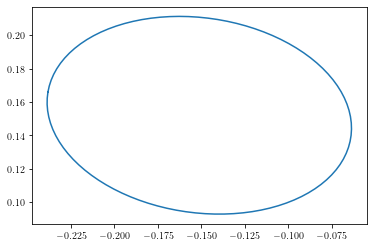

In [86]:
plt.plot(x, y)

In [89]:
minIV =[float('inf')]*len(SMEFT19.obsuncert.obslist)
maxIV =[-float('inf')]*len(SMEFT19.obsuncert.obslist)
for xp, yp in zip(x, y):
    for i, o in enumerate(SMEFT19.obsuncert.obslist):
        p = SMEFT19.SMEFTglob.prediction((xp, yp), o, scs[0])
        minIV[i] = min(minIV[i], p)
        maxIV[i] = max(maxIV[i], p)

In [90]:
x = []
y = []
for theta in np.linspace(0, 2*np.pi, 100):
    p = SMEFT19.ellipse.parametrize((np.cos(theta), np.sin(theta)), dictsc[-1]['bf'], dictsc[-1]['v'], dictsc[-1]['d'])
    x.append(p[0])
    y.append(p[1])

In [91]:
minXI =[float('inf')]*len(SMEFT19.obsuncert.obslist)
maxXI =[-float('inf')]*len(SMEFT19.obsuncert.obslist)
for xp, yp in zip(x, y):
    for i, o in enumerate(SMEFT19.obsuncert.obslist):
        p = SMEFT19.SMEFTglob.prediction((xp, yp), o, scs[-1])
        minXI[i] = min(minXI[i], p)
        maxXI[i] = max(maxXI[i], p)

In [92]:
with open('../data/observables/obsIV.yaml', 'rt') as f:
    yamlIV = yaml.safe_load(f)
for i, o in enumerate(SMEFT19.obsuncert.obslist):
    uStat = abs(maxIV[i]-minIV[i])
    yamlIV[str(o)]['NP']['uncert'] = float((yamlIV[str(o)]['NP']['uncert']**2-yamlIV[str(o)]['NP']['uStat']**2+uStat**2)**0.5)
    yamlIV[str(o)]['NP']['uStat'] = float(uStat)
with open('../data/observables/obsIV.yaml', 'wt') as f:
    yaml.dump(recursiveDict(yamlIV), f)

In [93]:
with open('../data/observables/obsXI.yaml', 'rt') as f:
    yamlXI = yaml.safe_load(f)
for i, o in enumerate(SMEFT19.obsuncert.obslist):
    uStat = abs(maxXI[i]-minXI[i])
    yamlXI[str(o)]['NP']['uncert'] = float((yamlXI[str(o)]['NP']['uncert']**2-yamlXI[str(o)]['NP']['uStat']**2+uStat**2)**0.5)
    yamlXI[str(o)]['NP']['uStat'] = float(uStat)
with open('../data/observables/obsXI.yaml', 'wt') as f:
    yaml.dump(recursiveDict(yamlXI), f)

In [94]:
x = []
y = []
z = []
for theta in np.linspace(0, np.pi, 20):
    for phi in np.linspace(0, 2*np.pi, 20):
        p = SMEFT19.ellipse.parametrize((np.sin(theta) * np.cos(phi), np.sin(theta) * np.sin(phi), np.cos(theta)), dictsc[1]['bf'], dictsc[1]['v'], dictsc[1]['d'])
        x.append(p[0])
        y.append(p[1])
        z.append(p[2])

In [95]:
minVII =[float('inf')]*len(SMEFT19.obsuncert.obslist)
maxVII =[-float('inf')]*len(SMEFT19.obsuncert.obslist)
for xp, yp, zp in zip(x, y, z):
    for i, o in enumerate(SMEFT19.obsuncert.obslist):
        p = SMEFT19.SMEFTglob.prediction((xp, yp, zp), o, scs[1])
        minVII[i] = min(minVII[i], p)
        maxVII[i] = max(maxVII[i], p)

In [96]:
with open('../data/observables/obsVII.yaml', 'rt') as f:
    yamlVII = yaml.safe_load(f)
for i, o in enumerate(SMEFT19.obsuncert.obslist):
    uStat = abs(maxVII[i]-minVII[i])
    yamlVII[str(o)]['NP']['uncert'] = float((yamlVII[str(o)]['NP']['uncert']**2-yamlVII[str(o)]['NP']['uStat']**2+uStat**2)**0.5)
    yamlVII[str(o)]['NP']['uStat'] = float(uStat)
with open('../data/observables/obsVII.yaml', 'wt') as f:
    yaml.dump(recursiveDict(yamlVII), f)

## Plots

In [97]:
from SMEFT19.plots import error_plot

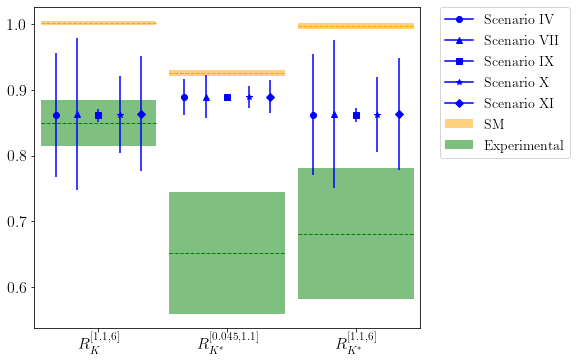

In [98]:
error_plot('../data/plots/RKplot', 'RK', ['../data/observables/obsIV.yaml', '../data/observables/obsVII.yaml',
                                        '../data/observables/obsIX.yaml', '../data/observables/obsX.yaml',
                                        '../data/observables/obsXI.yaml'], legend=1)

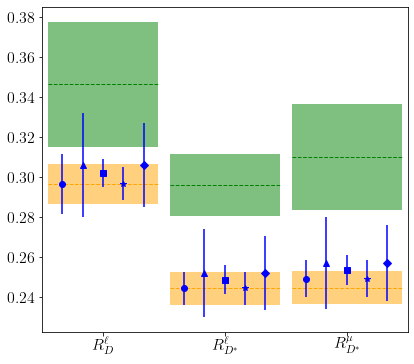

In [99]:
error_plot('../data/plots/RDplot', 'RD', ['../data/observables/obsIV.yaml', '../data/observables/obsVII.yaml',
                                        '../data/observables/obsIX.yaml', '../data/observables/obsX.yaml',
                                        '../data/observables/obsXI.yaml'], legend=0)